IA & Data science (LU3IN0226) -- 2020-2021
--------
*&copy; Equipe pÃ©dagogique: Vincent Guigue, Christophe Marsala, Edoardo Sarti, Olivier Schwander.*


# Premier bilan: classifieurs statistiques

Le but de ce notebook est de faire le point sur les premiers classifieurs qui ont Ã©tÃ© vus depuis le dÃ©but du semestre.


**<font color="RED">Remarque: dans ce notebook, les sorties attendues des boÃ®tes ont Ã©tÃ© supprimÃ©es, vous pouvez vous y rÃ©fÃ©rer dans le fichier HTML fourni. </font>**



## Travail Ã  faire
Ce notebook est divisÃ© en 2 parties. 
1. la partie "Mise en place" : ce sont les premiÃ¨res boÃ®tes de ce notebook, elles servent Ã  vÃ©rifier que vos classifieurs fonctionnent.
2. la partie "ExpÃ©rimentations" : cette partie est libre, vous pouvez la complÃ©ter comme vous le souhaitez

## Rendu et exposÃ© en semaine 9
Ce notebook est Ã  rendre, sur Moodle, <font color="RED">**le mardi 6 avril Ã  16h au plus tard**</font> quel que soit votre groupe. 

Ce qui est Ã  rendre:
1. ce notebook
2. votre fichier `Classifiers.py`
3. votre fichier `utils.py`

Les 3 fichiers doivent Ãªtre mis dans un fichier archive (zip ou tar.gz ou tgz) : cette archive est remise sur le site Moodle : une archive par binÃ´me (un seul membre soumet pour les 2).

Lors de la sÃ©ance de TDTME de la semaine 9 de votre groupe, un exposÃ© de 10mn sera fait par chaque binÃ´me afin de prÃ©senter le travail rÃ©alisÃ©.

Ce travail (compte-rendu et exposÃ©) sera notÃ© sur 10 et comptera pour 10% de la note finale d'UE.

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boÃ®te ci-dessous vos noms et prÃ©noms :**

JDAY Achraf 

TALEB Rida

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>bilan-1</tt> et rajouter Ã  la suite de <tt>bilan-1</tt> les noms des membres du binÃ´mes sÃ©parÃ©s par un tiret.

Par exemple, pour le binÃ´me Luke Skywalker et Han Solo, le nom de fichier devient `bilan-1-Skywalker-Solo`

Penser Ã  sauvegarder frÃ©quemment le fichier en cours de travail :
- soit en cliquant sur l'icÃ´ne "disquette"
- soit par la combinaison de touches [Ctrl]-S

In [2]:
# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

In [6]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import pickle as pkl
%matplotlib inline  

In [95]:
#Â Importation de votre librairie iads:
#Â La ligne suivante permet de prÃ©ciser le chemin d'accÃ¨s Ã  la librairie iads
import sys
sys.path.append('../')   # iads doit Ãªtre dans le rÃ©pertoire frÃ¨re du rÃ©pertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut


In [9]:
# Importation du package seaborn:
import seaborn as sns

In [79]:
#Â Graine pour les tirages alÃ©atoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminÃ©e

# 1. Mise en place

## DonnÃ©es jouet

Pour Ãªtre sÃ»r d'avoir un modÃ¨le assez constant, on prend un problÃ¨me trÃ¨s simple, c'est-Ã -dire un problÃ¨me oÃ¹ les distribution des classes des donnÃ©es d'apprentissage sont trÃ¨s bien sÃ©parÃ©es. Pour cela, il suffit de gÃ©nÃ©rer des donnÃ©es selon des gaussiennes trÃ¨s Ã©cartÃ©es.

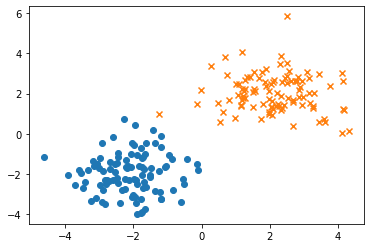

In [80]:
# Exemple d'utilisation:
np.random.seed(42)   #Â on prend 42 comme graine

# gÃ©nÃ©rer des donnÃ©es gaussienne 2D

N = 100
X,Y =  ut.genere_dataset_gaussian([-2,-2],[[1,0],[0,1]], [2,2],[[1,0],[0,1]],N)

ut.plot2DSet(X,Y)

# remarque: dans votre fonction plot2DSet() rajouter la ligne suivante:
#Â plt.grid(True)
# afin d'avoir l'affichage d'une grille pour les valeurs des axes

Pour vÃ©rifier que les valeurs sont les mÃªmes pour les 5 premiers exemples:

In [81]:
#Â Exemples de la classe +1
X[Y==+1][0:5,:]

array([[2.35778736, 2.56078453],
       [3.08305124, 3.05380205],
       [0.62233063, 1.06217496],
       [2.51503527, 2.51378595],
       [2.51504769, 5.85273149]])

In [82]:
#Â Exemples de la classe -1
X[Y==-1][0:5,:]

array([[-1.50328585, -2.1382643 ],
       [-1.35231146, -0.47697014],
       [-2.23415337, -2.23413696],
       [-0.42078718, -1.23256527],
       [-2.46947439, -1.45743996]])

<font color="RED" size="+1">[Q]</font> Avant d'appliquer un classifieur, proposer une droite, passant par l'origine, et permettant de sÃ©parer les exemples des 2 classes.

Une fois votre droite trouvÃ©e, comme elle passe par le point $(0,0)$, elle vÃ©rifie donc l'Ã©quation $w_1 x_1+w_2 x_2 =0$, calculer (Ã  la main) les valeurs de $w_1$ et $w_2$ pour cette droite.

<font color="BLUE" size="+1">[R]</font> 
<br>On constate sur le graphe une droite qui permettrait de separer les 2 classes est la droite qui passe par (0,0) et (2,-2)
<br>
x2 = -x1
donc w1 = w2 = 1

##  Algorithme des $k$ plus proches voisins


Accuracy pour k=1:  100.0


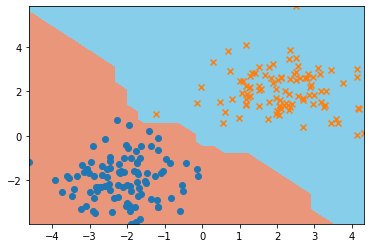

In [83]:
# CrÃ©ation d'un knn avec k=1 et 2 dimensions pour les donnÃ©es
classifierKNN = classif.ClassifierKNN(2,1)

# EntraÃ®nement du classifier:
classifierKNN.train(X,Y)

#Â Affichage de la frontiÃ¨re de sÃ©paration des classes
ut.plot_frontiere(X,Y,classifierKNN)
ut.plot2DSet(X,Y)

#Â Performance de ce classifieur:
print("Accuracy pour k=1: ",classifierKNN.accuracy(X,Y))

Accuracy pour k=5:  99.5


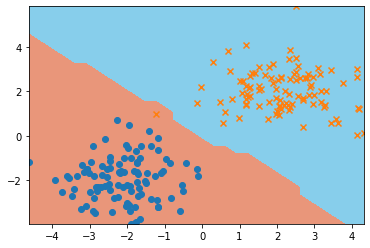

In [84]:
# CrÃ©ation d'un knn avec k=1 et 2 dimensions pour les donnÃ©es
classifierKNN5 = classif.ClassifierKNN(2,5)

# EntraÃ®nement du classifier:
classifierKNN5.train(X,Y)

#Â Affichage de la frontiÃ¨re de sÃ©paration des classes
ut.plot_frontiere(X,Y,classifierKNN5)
ut.plot2DSet(X,Y)

#Â Performance de ce classifieur:
print("Accuracy pour k=5: ",classifierKNN5.accuracy(X,Y))

<font color="RED" size="+1">[Q]</font> Combien d'exemples sont mal classÃ©s par l'algorithme des kppv quand $k$ vaut 5? Pourquoi sont-ils mal classÃ©s ? VÃ©rifiez "Ã  la main" que le rÃ©sultat est correct en ce qui les concerne.

Il est mal classé car ses 5 nearest neighbors sont de la classe opposees

##  Perceptron de Rosenblatt

Information sur le perceptron implÃ©mentÃ© qui a Ã©tÃ© utilisÃ© par la suite dans ce notebook:
- initialisation des poids : mis Ã  0
- mÃ©thode train: un seul parcours de tous le training set en prenant les exemples dans un ordre alÃ©atoire (gÃ©nÃ©rÃ© par shuffle)
- mise Ã  jour des poids dans le train: Ã  chaque mauvaise classification, version du TME3, une mauvaise classification se produit quand la prÃ©diction n'est pas la classe de l'exemple.


<font color="RED" size="+1">ATTENTION !</font> L'algorithme du perceptron que l'on a vu peut Ãªtre implÃ©mentÃ© de diffÃ©rentes maniÃ¨res, il se peut donc que vous ne trouviez pas **exactement** les mÃªmes valeurs que celles qui sont indiquÃ©es en rÃ©sultat dans les boÃ®tes qui suivent. Cela peut Ãªtre normal !

### Essai avec un learning rate faible

<font color="RED" size="+1">[Q]</font> Avant de rÃ©aliser les expÃ©rimentations suivantes, rajouter dans la classe `ClassifieurPerceptron` un accesseur pour le vecteur de poids courant du classifieur:

In [85]:
#Â  A RAJOUTER DANS LA CLASSE ClassifierPerceptron:

def getW(self):
    """ rend le vecteur de poids actuel du perceptron
    """
    return self.w


Accuracy du perceptron ( 0.001 ) aprÃ¨s 1 train:  99.5
Vecteur de poids trouvÃ©:  [0.28516655 0.26797078]


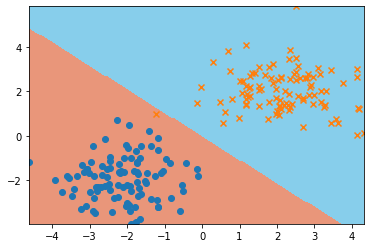

In [86]:
#Â Choix du learning rate
learning_rate = 1e-3

#Â Graine pour les tirages alÃ©atoires :
np.random.seed(42)  

# CrÃ©ation d'un perceptron
perceptronV0 = classif.ClassifierPerceptron(2, learning_rate)

# EntraÃ®nement du classifier:
perceptronV0.train(X,Y)

#Â Affichage de la frontiÃ¨re de sÃ©paration des classes
# On augmente la qualitÃ© du tracÃ© en prenant un step Ã©levÃ©:
ut.plot_frontiere(X,Y,perceptronV0,step=150)
ut.plot2DSet(X,Y)

#Â Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,") aprÃ¨s 1 train: ",perceptronV0.accuracy(X,Y))
print("Vecteur de poids trouvÃ©: ", perceptronV0.getW())

<font color="RED" size="+1">[Q]</font> Comparer le vecteur de poids trouvÃ© par votre classifieur avec les poids de la droite que vous aviez proposÃ©s. Qu'en pensez-vous ?

Nous remarquons que nous sommes loin de notre vecteur. Nous pouvons donc obtenir un meilleur w.

On dÃ©cide de rÃ©aliser plusieurs fois l'apprentissage du perceptron:

Accuracy du perceptron ( 0.001 ) aprÃ¨s les 11 train:  99.5
Vecteur de poids trouvÃ©:  [0.78299581 0.77509986]


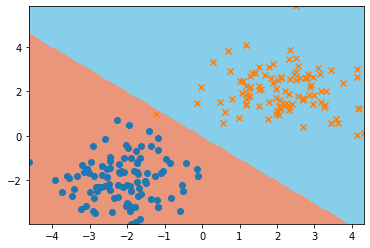

In [87]:
#Â Graine pour les tirages alÃ©atoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminÃ©e

# on rajoute 10 appels de train aprÃ¨s le train de la boÃ®te prÃ©cÃ©dente:
for i in range(0,100):
    perceptronV0.train(X,Y)
    
#Â Affichage de la frontiÃ¨re de sÃ©paration des classes
ut.plot_frontiere(X,Y,perceptronV0,step=150)
ut.plot2DSet(X,Y)

#Â Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,") aprÃ¨s les 11 train: ",perceptronV0.accuracy(X,Y))  
print("Vecteur de poids trouvÃ©: ", perceptronV0.getW())

<font color="RED" size="+1">[Q]</font> Que constate-t-on sur le vecteur des poids ? Est-ce normal ? Expliquez.

Ici le vecteur est bien plus proche du notre, c'est normal car nous l'affinons bien plus en le re-entrainant.

## Affichage de l'Ã©volution du coÃ»t (cf. TME4)


Accuracy du perceptron ( 0.001 ):  99.5
Vecteur de poids final trouvÃ©:  [0.49160268 0.47212941]


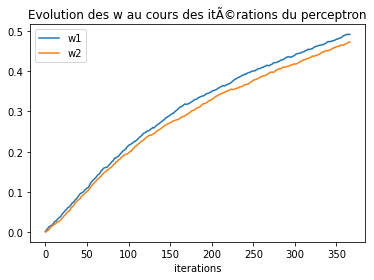

In [88]:
#Â Choix du learning rate
learning_rate = 1e-3

#Â Graine pour les tirages alÃ©atoires :
np.random.seed(42)  

#Â CrÃ©ation et entraÃ®nement du perceptron sur les donnÃ©es gÃ©nÃ©rÃ©es
#Â On utilise la mÃ©morisation de l'historique des poids comme vu en TME 4
perceptronV1 = classif.ClassifierPerceptron(2, learning_rate, history=True)

# on rÃ©alise 10 appels de train:
for i in range(0,10):
    perceptronV1.train(X,Y)

# rÃ©cupÃ©ration de l'Ã©volution des w au cours de l'apprentissage 
allw = np.array(perceptronV1.allw) # si allw est sous forme de liste

#Â TracÃ© de l'Ã©volution des w:
plt.figure()
plt.plot(allw[:,0]) #Â premiÃ¨re coordonnÃ©e du vecteur poids: w1
plt.plot(allw[:,1]) #Â deuxiÃ¨me coordonnÃ©e du vecteur poids: w2
plt.title('Evolution des w au cours des itÃ©rations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

#Â Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,"): ",perceptronV1.accuracy(X,Y)) 
print("Vecteur de poids final trouvÃ©: ", perceptronV1.getW())

On va faire la mÃªme chose mais cette fois-ci, on utilise la version du Perceptron avec biais implÃ©mentÃ©e lors du TME 4 : c'est-Ã -dire une version oÃ¹ les points ne sont considÃ©rÃ©s bien classÃ©s que dans le cas oÃ¹ $f(\mathbf x_i) y_i>1$ (cela influence donc sur la mise Ã  jour des poids).


Accuracy du perceptron ( 0.001 ):  100.0
Nombre de mises Ã  jour des poids:  6256


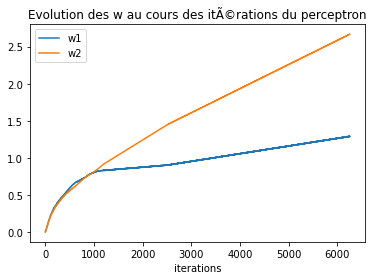

In [89]:
np.random.seed(42)   #Â on prend 42 comme graine

learning_rate =1e-3

#Â CrÃ©ation et entraÃ®nement du perceptron sur les donnÃ©es gÃ©nÃ©rÃ©es
perceptronV2b = classif.ClassifierPerceptron(2, learning_rate, history=True)

# on rajoute 10 appels de train aprÃ¨s le train de la boÃ®te prÃ©cÃ©dente:
for i in range(0,5000):
    perceptronV2b.train(X,Y)

# rÃ©cupÃ©ration de l'Ã©volution des w au cours de l'apprentissage 
# perceptron initialisÃ© Ã  0
allw = np.array(perceptronV2b.allw) # si allw est sous forme de liste

#Â TracÃ© de l'Ã©volution des w:
plt.figure()
plt.plot(allw[:,0]) #Â premiÃ¨re coordonnÃ©e du vecteur poids: w1
plt.plot(allw[:,1]) #Â deuxiÃ¨me coordonnÃ©e du vecteur poids: w2
plt.title('Evolution des w au cours des itÃ©rations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

#Â Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,"): ",perceptronV2b.accuracy(X,Y))  
print("Nombre de mises Ã  jour des poids: ",len(allw))

Accuracy du perceptron ( 0.001 ) aprÃ¨s les 11 train:  99.5
Vecteur de poids trouvÃ©:  [0.78173727 0.77331477]


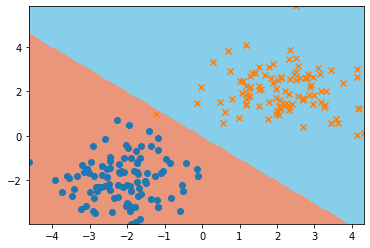

In [90]:
#Â Changement du learning rate : on le prend trÃ¨s grand !
learning_rate = 1e-3

#Â Graine pour les tirages alÃ©atoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminÃ©e

# CrÃ©ation d'un perceptron
perceptronV2 = classif.ClassifierPerceptron(2,learning_rate,history=True)

# on rajoute 100 appels de train:
for i in range(0,100):
    perceptronV2.train(X,Y)
    
#Â Affichage de la frontiÃ¨re de sÃ©paration des classes
ut.plot_frontiere(X,Y,perceptronV2,step=150)
ut.plot2DSet(X,Y)

#Â Performance de ce classifieur:
print("Accuracy du perceptron (", learning_rate,") aprÃ¨s les 11 train: ",perceptronV2.accuracy(X,Y))  
print("Vecteur de poids trouvÃ©: ", perceptronV2.getW())

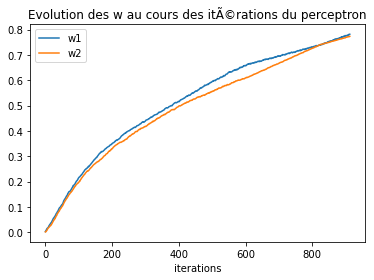

In [91]:
# rÃ©cupÃ©ration de l'Ã©volution des w au cours de l'apprentissage 
allw = np.array(perceptronV2.allw) # si allw est sous forme de liste

#Â TracÃ© de l'Ã©volution des w:
plt.figure()
plt.plot(allw[:,0]) #Â premiÃ¨re coordonnÃ©e du vecteur poids: w1
plt.plot(allw[:,1]) #Â deuxiÃ¨me coordonnÃ©e du vecteur poids: w2
plt.title('Evolution des w au cours des itÃ©rations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])


## Cross-validation

Si ce n'est pas dÃ©jÃ  encore fait, pensez Ã  rajouter les fonctions `crossval` et `crossval_strat` Ã©crites au TME 4 dans le fichier `utils.py` de votre librairie `iads`.


In [92]:
#Â Changement du learning rate : on le prend trÃ¨s grand !
learning_rate = 1e-3

#Â Graine pour les tirages alÃ©atoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminÃ©e

niter = 10 
perf = []

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval(X, Y, niter, i)
    cl = classif.ClassifierPerceptron(2,learning_rate)
    for j in range(0,10):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)
print(f'\nRÃ©sultat global:\tmoyenne= {perf.mean():.3f}\tÃ©cart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  180  |Ytest|=  20 	perf=  100.0
Apprentissage  2 :	  |Yapp|=  180  |Ytest|=  20 	perf=  100.0
Apprentissage  3 :	  |Yapp|=  180  |Ytest|=  20 	perf=  100.0
Apprentissage  4 :	  |Yapp|=  180  |Ytest|=  20 	perf=  100.0
Apprentissage  5 :	  |Yapp|=  180  |Ytest|=  20 	perf=  100.0
Apprentissage  6 :	  |Yapp|=  180  |Ytest|=  20 	perf=  95.0
Apprentissage  7 :	  |Yapp|=  180  |Ytest|=  20 	perf=  100.0
Apprentissage  8 :	  |Yapp|=  180  |Ytest|=  20 	perf=  100.0
Apprentissage  9 :	  |Yapp|=  180  |Ytest|=  20 	perf=  100.0
Apprentissage  10 :	  |Yapp|=  180  |Ytest|=  20 	perf=  100.0

RÃ©sultat global:	moyenne= 99.500	Ã©cart-type= 1.500


## DonnÃ©es plus compliquÃ©es

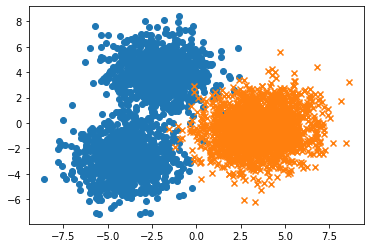

In [93]:
# Exemple d'utilisation:
np.random.seed(42)   #Â on prend 42 comme graine

# gÃ©nÃ©rer des donnÃ©es gaussienne 2D

N = 1000
X1,Y1 =  ut.genere_dataset_gaussian([-4,-3],[[2,0],[0,2]], [4,0],[[2,0],[0,2]],N)
X2,Y2 =  ut.genere_dataset_gaussian([-2,4],[[2,0],[0,2]], [3,-1],[[2,0],[0,2]],N)

Xdur = np.concatenate((X1,X2))
Ydur = np.concatenate((Y1,Y2))

ut.plot2DSet(Xdur,Ydur)


In [94]:
#Â On va utiliser un chronomÃ¨tre pour avoir le temps d'exÃ©cution :
import timeit


In [95]:
#Â Changement du learning rate : on le prend trÃ¨s grand !
learning_rate = 1e-3

#Â Graine pour les tirages alÃ©atoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminÃ©e

niter = 10 
perf = []

nb_train = 20 #Â Nombre de lancement de la fonction train()

tic = timeit.default_timer() # heure de dÃ©part

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval(Xdur, Ydur, niter, i)
    cl = classif.ClassifierPerceptron(2,learning_rate)
    for j in range(0,nb_train):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])
    
toc = timeit.default_timer() # heure d'arrivÃ©e

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)

print(f'\nTemps mis: PerceptronBiais avec nb_train= {nb_train} --> {toc-tic:.5f} secondes')
print(f'RÃ©sultat global:\tmoyenne= {perf.mean():.3f}\tÃ©cart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  99.0
Apprentissage  2 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  99.0
Apprentissage  3 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  98.25
Apprentissage  4 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  98.5
Apprentissage  5 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  99.0
Apprentissage  6 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  98.75
Apprentissage  7 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  98.5
Apprentissage  8 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  99.25
Apprentissage  9 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  99.0
Apprentissage  10 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  99.5

Temps mis: PerceptronBiais avec nb_train= 20 --> 1.59064 secondes
RÃ©sultat global:	moyenne= 98.875	Ã©cart-type= 0.358


In [96]:
#Â Graine pour les tirages alÃ©atoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminÃ©e

niter = 10 
perf = []

val_k = 7 #Â valeur de k

tic = timeit.default_timer() # heure de dÃ©part

for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval(Xdur, Ydur, niter, i)
    cl = classif.ClassifierKNN(2,val_k)
    for j in range(0,nb_train):
        cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

toc = timeit.default_timer() # heure d'arrivÃ©e

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)

print(f'\nTemps mis: KNN avec k= {val_k} --> {toc-tic:.5f} secondes')
print(f'RÃ©sultat global:\tmoyenne= {perf.mean():.3f}\tÃ©cart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  99.5
Apprentissage  2 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  99.0
Apprentissage  3 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  99.25
Apprentissage  4 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  98.75
Apprentissage  5 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  99.5
Apprentissage  6 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  98.75
Apprentissage  7 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  98.25
Apprentissage  8 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  99.75
Apprentissage  9 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  99.0
Apprentissage  10 :	  |Yapp|=  3600  |Ytest|=  400 	perf=  99.5

Temps mis: KNN avec k= 7 --> 42.16302 secondes
RÃ©sultat global:	moyenne= 99.125	Ã©cart-type= 0.437


# DonnÃ©es multiclasses


Pour gÃ©nÃ©rer des donnÃ©es multiclasses, une faÃ§on trÃ¨s simple est d'utiliser le gÃ©nÃ©rateur de donnÃ©es gaussienne et de rÃ©Ã©tiquetter les classes des exemples.

Par exemple:

In [97]:
# Exemple d'utilisation:
np.random.seed(42)   #Â on prend 42 comme graine

# gÃ©nÃ©rer des donnÃ©es gaussienne 2D et rÃ©Ã©tiquetter
N = 100

X1,Y1 =  ut.genere_dataset_gaussian([-3,-3],[[1,0],[0,1]], [3,-3],[[1,0],[0,1]],N)
Y1[Y1==-1]= 0
#Â Y1[Y1==+1]= 1 #Â Inutile...

X2,Y2 =  ut.genere_dataset_gaussian([-3,3],[[1,0],[0,1]], [3,3],[[1,0],[0,1]],N)
Y2[Y2==-1]= 2
Y2[Y2==+1]= 3

Xmulti = np.concatenate((X1,X2))
Ymulti = np.concatenate((Y1,Y2))



<font color="RED" size="+1">[Q]</font> En vous inspirant de votre fonction `plot2DSet`, Ã©crire la fonction `plot2DSetMulticlass` qui permet d'afficher les exemples Ã©tiquettÃ©s en plusieurs classes.

In [98]:
def plot2DSetMulticlass(desc,labels):
    

    """ ndarray * ndarray -> affichage
        la fonction doit utiliser la couleur 'red' pour la classe -1 et 'blue' pour la +1
    """
    val = np.unique(labels)
    data = []
    for i in val:
        data.append(desc[labels == i])
    for i in range(len(data)):
        rgb = np.random.rand(3,)
        plt.scatter(data[i][:,0],data[i][:,1],marker='o', color=[rgb])


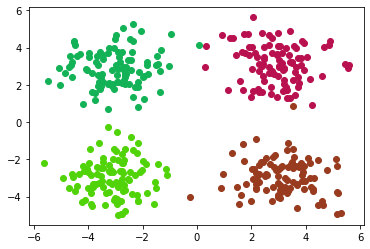

In [99]:
# Par exemple :
ut.plot2DSetMulticlass(Xmulti,Ymulti)

In [100]:
#Â Exemples de la classe 0
Xmulti[Ymulti==0][0:5,:]

array([[-2.50328585, -3.1382643 ],
       [-2.35231146, -1.47697014],
       [-3.23415337, -3.23413696],
       [-1.42078718, -2.23256527],
       [-3.46947439, -2.45743996]])

In [101]:
#Â Exemples de la classe 1
Xmulti[Ymulti==1][0:5,:]

array([[ 3.35778736, -2.43921547],
       [ 4.08305124, -1.94619795],
       [ 1.62233063, -3.93782504],
       [ 3.51503527, -2.48621405],
       [ 3.51504769,  0.85273149]])

In [102]:
#Â Exemples de la classe 2
Xmulti[Ymulti==2][0:5,:]

array([[-4.59442766,  2.40062498],
       [-2.9947563 ,  3.04698059],
       [-3.45006547,  3.62284993],
       [-4.06762043,  2.85762051],
       [-2.87970437,  3.51443883]])

In [103]:
#Â Exemples de la classe 3
Xmulti[Ymulti==3][0:5,:]

array([[3.75698862, 2.07783468],
       [3.86960592, 4.35563786],
       [3.4134349 , 4.87679581],
       [2.2262108 , 1.7553453 ],
       [1.22127975, 4.49604431]])

In [104]:
#Â Changement du learning rate : on le prend trÃ¨s grand !
learning_rate = 1e-3

#Â Graine pour les tirages alÃ©atoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminÃ©e

# CrÃ©ation d'un perceptron
perceptronV3 = classif.ClassifierPerceptron(2,learning_rate)

perceptmulti = classif.ClassifierMultiOAA(perceptronV3)



In [105]:
perceptmulti.train(Xmulti,Ymulti)
print("Accuracy globale: ",perceptmulti.accuracy(Xmulti,Ymulti))
    

Accuracy globale:  0.9925


In [106]:
for i in range(0,5):
    print(i+1,": (",Ymulti[i],") --> ",perceptmulti.predict(Xmulti[i,:]), "(",perceptmulti.score(Xmulti[i,:]),")")

1 : ( 0 ) -->  0 ( [1.237490755130921, 0.10155387023557216, -0.17493903143222045, -1.3048443732462736] )
2 : ( 0 ) -->  0 ( [0.8518046730463134, -0.23414929556953268, 0.1700024683938653, -0.8790081386432836] )
3 : ( 0 ) -->  0 ( [1.4254375311931688, -0.05247606890899936, -0.03965280558322093, -1.492343431228047] )
4 : ( 0 ) -->  0 ( [0.7977429344706604, 0.15870133343518028, -0.20182816342153986, -0.8470368495961644] )
5 : ( 0 ) -->  0 ( [1.315305520097243, -0.28287952886272216, 0.1873557964430398, -1.362269051294425] )


In [107]:
#Â Changement du learning rate : on le prend trÃ¨s grand !
learning_rate = 1e-3

#Â Graine pour les tirages alÃ©atoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminÃ©e

# CrÃ©ation d'un KNN
kppvMC = classif.ClassifierKNN(2,3)

kppvMulti = classif.ClassifierMultiOAA(kppvMC)



In [108]:
kppvMulti.train(Xmulti,Ymulti)
print("Accuracy globale: ",kppvMulti.accuracy(Xmulti,Ymulti))


Accuracy globale:  0.995


Pour avoir un affichage de la frontiÃ¨re de sÃ©paration des classes, il faut une version de la fonction `plot_frontiere` qui soit capable de traiter plusieurs classes, que l'on considÃ¨re Ã©gales Ã  0, 1, 2, 3,...

In [109]:
def plot_frontiere_multiclass(desc_set, label_set, classifier, step=30):
    """ desc_set * label_set * Classifier * int -> NoneType
        Remarque: le 4e argument est optionnel et donne la "rÃ©solution" du tracÃ©
        affiche la frontiÃ¨re de dÃ©cision associÃ©e au classifieur
        cette version reconnaÃ®t jusqu'Ã  4 classes (notÃ©e: 0, 1, 2 et 3)
    """
    mmax=desc_set.max(0)
    mmin=desc_set.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    #Â colors[0] est la couleur des -1 et colors[1] est la couleur des +1
    plt.contourf(x1grid,x2grid,res,colors=["darksalmon",'skyblue','#FFDF9E','#B1FB17'],levels=[-1,0,1,2,3,4])    


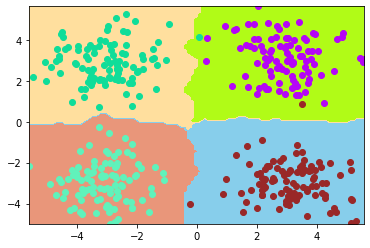

In [110]:
#Â Affichage de la frontiÃ¨re de sÃ©paration des classes
plot_frontiere_multiclass(Xmulti,Ymulti,kppvMulti,step=100)
ut.plot2DSetMulticlass(Xmulti,Ymulti)


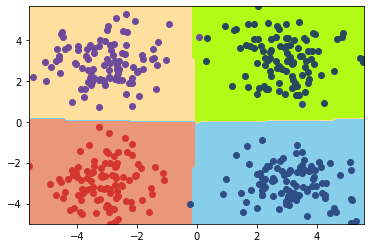

In [111]:
#Â Affichage de la frontiÃ¨re de sÃ©paration des classes
plot_frontiere_multiclass(Xmulti,Ymulti,perceptmulti,step=150)
ut.plot2DSetMulticlass(Xmulti,Ymulti)


In [112]:
#Â Changement du learning rate : on le prend trÃ¨s grand !
learning_rate = 1e-3

#Â Graine pour les tirages alÃ©atoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminÃ©e

niter = 10 
perf = []

tic = timeit.default_timer() # heure de dÃ©part
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval(Xmulti, Ymulti, niter, i)
    cl = classif.ClassifierMultiOAA(classif.ClassifierPerceptron(2,learning_rate))
    cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])
toc = timeit.default_timer() # heure d'arrivÃ©e

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)

print(f'\nTemps mis: --> {toc-tic:.5f} secondes')
print(f'RÃ©sultat global:\tmoyenne= {perf.mean():.3f}\tÃ©cart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  360  |Ytest|=  40 	perf=  0.975
Apprentissage  2 :	  |Yapp|=  360  |Ytest|=  40 	perf=  1.0
Apprentissage  3 :	  |Yapp|=  360  |Ytest|=  40 	perf=  1.0
Apprentissage  4 :	  |Yapp|=  360  |Ytest|=  40 	perf=  0.975
Apprentissage  5 :	  |Yapp|=  360  |Ytest|=  40 	perf=  0.975
Apprentissage  6 :	  |Yapp|=  360  |Ytest|=  40 	perf=  1.0
Apprentissage  7 :	  |Yapp|=  360  |Ytest|=  40 	perf=  1.0
Apprentissage  8 :	  |Yapp|=  360  |Ytest|=  40 	perf=  1.0
Apprentissage  9 :	  |Yapp|=  360  |Ytest|=  40 	perf=  1.0
Apprentissage  10 :	  |Yapp|=  360  |Ytest|=  40 	perf=  1.0

Temps mis: --> 0.11043 secondes
RÃ©sultat global:	moyenne= 0.993	Ã©cart-type= 0.011


# 2. ExpÃ©rimentations 


ComplÃ©ter ce notebook aevc des expÃ©rimentations permettant de rÃ©aliser une comparaison des algorithmes que vous avez implÃ©mentÃ©s (kppv, perceptron, kernel perceptron, adaline) sur un jeu de donnÃ©es rÃ©elles.


# Un aperÃ§u des techniques de classification supervisÃ©e avec une Ã©tude de cas :
## PrÃ©dire les maladies du foie Ã  partir de donnÃ©es

## Introduction


Selon les donnÃ©es de l'OMS publiÃ©es en 2017, les dÃ©cÃ¨s par maladie du foie en Inde ont atteint 259,749 soit 2,95% du total des dÃ©cÃ¨s. Ce projet vise Ã  classer ces donnÃ©es et Ã  fournir des informations utiles qui peuvent aider les mÃ©decins.

Nous allons parcourir l'ensemble du pipeline de donnÃ©es, depuis le nettoyage des donnÃ©es, le prÃ©traitement, la mise en scÃ¨ne et la modÃ©lisation sur un ensemble de donnÃ©es relativement petit (~600 entrÃ©es). En cours de route, nous comparerons diffÃ©rents modÃ¨les de machine learning et nous mesurons leurs performances.

## Dataset


Le jeu de donnÃ©es utilisÃ© pour la classification est obtenu Ã  partir de kaggle. Il contient des donnÃ©es sur les composÃ©s chimiques obtenues Ã  partir de tests tels que SGOT, SGPT qui indiquent si un patient doit Ãªtre diagnostiquÃ© ou non.

Cet ensemble de donnÃ©es contient 416 enregistrements de patients atteints d'une maladie du foie et 167 enregistrements de patients non atteints d'une maladie du foie,collectÃ©s dans le nord-est de l'Andhra Pradesh, en Inde. La colonne "Dataset" est une Ã©tiquette de classe utilisÃ©e pour diviser les groupes en patients atteints d'une maladie du foie (maladie du foie) ou non (pas de maladie). Cet ensemble de donnÃ©es contient 441 enregistrements de patients masculins et 142 enregistrements de patients fÃ©minins.

Tout patient dont l'Ã¢ge dÃ©passe 89 ans est rÃ©pertoriÃ© comme ayant l'Ã¢ge "90".

Colonnes :

- Age of the patient
- Gender of the patient
- Total Bilirubin
- Direct Bilirubin
- Alkaline Phosphotase
- Alamine Aminotransferase
- Aspartate Aminotransferase
- Total Protiens
- Albumin
- Albumin and Globulin Ratio
- Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

----
## Lecture des donnÃ©es
Ci-dessous, nous allons charger les donnÃ©es de l'ILPD. 

In [17]:
import matplotlib.pyplot as plt

In [18]:
# Nous aurons besoin des bibliothÃ¨ques suivantes
import numpy as np
import pandas as pd


# Chargement de l'ensemble de donnÃ©es ILPD
df = pd.read_csv("ILPD.csv")

print (f"nombre d'Ã©chantillons: {df.shape[0]}. Nombre de caractÃ©ristiques dans chaque Ã©chantillon: {df.shape[1]} .")
# Afficher les 5 premiers enregistrements
df.head()



nombre d'Ã©chantillons: 583. Nombre de caractÃ©ristiques dans chaque Ã©chantillon: 11 .


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [19]:
# crÃ©er une colonne basÃ©e sur le jeu de donnÃ©es pour voir si un patient a une maladie ou non
def label_disease(df):
    if df["Dataset"] == 1:
        return 'yes'
    return 'no'

df['HasDisease'] = df.apply(lambda df: label_disease(df), axis=1)
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,HasDisease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,yes
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,yes
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,yes
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,yes
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,yes


----
## PrÃ©traitement des donnÃ©es

### 1. Suppression des doublons
Les lignes en double peuvent Ãªtre prÃ©sentes dans les donnÃ©es pour diverses raisons. 

Dans notre cas, la suppression des doublons est logique, car il est trÃ¨s probable que quelqu'un ait saisi les donnÃ©es d'un patient plusieurs fois.

In [20]:
df.shape # lignes, colonnes de l'ensemble de donnÃ©es original

(583, 12)

In [21]:
df_duplicate = df[df.duplicated(keep = False)] # keep = False nous donne toutes les lignes avec des entrÃ©es dupliquÃ©es
df_duplicate

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,HasDisease
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1,yes
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1,yes
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1,yes
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1,yes
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2,no
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2,no
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1,yes
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1,yes
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1,yes
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1,yes


In [22]:
df = df[~df.duplicated(subset = None, keep = 'first')]
# Ici, keep = 'first' garantit que seule la premiÃ¨re ligne est prise en compte dans l'ensemble de donnÃ©es final.
# Le signe '~' indique Ã  pandas de conserver toutes les valeurs sauf les 13 valeurs en double.
df.shape

(570, 12)

### 2. Traitement des valeurs nulles

Nous allons supprimer les valeurs nulles (ou effectuer une sorte d'imputation) avant d'exÃ©cuter les modÃ¨les sur les donnÃ©es. Nous pouvons utiliser Imputer de sklearn.preprocessing ou fillna() Ã  cette fin.

In [23]:
print(df.isnull().sum()) # afficher le nombre de valeurs nulles par colonne

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
HasDisease                    0
dtype: int64


In [24]:
# Nous pouvons voir que la colonne 'Albumin_and_Globulin_Ratio' a 4 valeurs manquantes.
# Une faÃ§on de les traiter est de supprimer directement ces 4 valeurs.
print ("longueur avant la suppression des valeurs NaN:%d"%len(df))
df2 = df[pd.notnull(df['Albumin_and_Globulin_Ratio'])]
print ("longueur aprÃ¨s suppression des valeurs NaN:%d"%len(df2))

longueur avant la suppression des valeurs NaN:570
longueur aprÃ¨s suppression des valeurs NaN:566


L'imputation des valeurs manquantes Ã  l'aide d'une certaine statistique d'ordre (moyenne, mode, mÃ©diane) peut Ãªtre effectuÃ©e si le contexte est suffisant. Par exemple - Dans notre cas, imprimons les lignes dont les valeurs de la colonne 'Albumin_and_Globulin_Ratio' sont manquantes.

In [25]:
df[~pd.notnull(df['Albumin_and_Globulin_Ratio'])]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,HasDisease
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1,yes
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1,yes
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2,no
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2,no


Il n'y a pas d'homogÃ©nÃ©itÃ© entre les patients, du moins en termes d'Ã¢ge et de sexe, il peut donc Ãªtre plus difficile d'imputer une valeur dans ce cas. Pour l'instant, afin de montrer comment l'imputation est effectuÃ©e, nous allons remplacer ces valeurs par le mode de 'Albumin_and_Globulin_Ratio'. 
Plus tard, nous pourrons vÃ©rifier l'importance de la variable "Albumin_and_Globulin_Ratio" pour voir si cette colonne est suffisamment significative pour justifier l'essai de diffÃ©rentes imputations.


In [26]:
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mode().iloc[0])
df['Albumin_and_Globulin_Ratio'].unique()

array([0.9 , 0.74, 0.89, 1.  , 0.4 , 1.3 , 1.1 , 1.2 , 0.8 , 0.6 , 0.87,
       0.7 , 0.92, 0.55, 0.5 , 1.85, 0.95, 1.4 , 1.18, 0.61, 1.34, 1.39,
       1.6 , 1.58, 1.25, 0.78, 0.76, 1.55, 0.71, 0.62, 0.67, 0.75, 1.16,
       1.5 , 1.66, 0.96, 1.38, 0.52, 0.47, 0.93, 0.48, 0.58, 0.69, 1.27,
       1.12, 1.06, 0.53, 1.03, 0.68, 1.9 , 1.7 , 1.8 , 0.3 , 0.97, 0.35,
       1.51, 0.64, 0.45, 1.36, 0.88, 1.09, 1.11, 1.72, 2.8 , 0.46, 0.39,
       1.02, 2.5 , 0.37])

In [27]:
df['Albumin_and_Globulin_Ratio'].value_counts() #1 se produit en fait deux fois plus que la valeur frÃ©quente suivante, cela devrait peut-Ãªtre donner une justification de la raison pour laquelle le mode peut Ãªtre appropriÃ©.

1.00    108
0.80     62
0.90     57
0.70     53
1.10     45
       ... 
0.88      1
1.02      1
1.09      1
0.89      1
1.36      1
Name: Albumin_and_Globulin_Ratio, Length: 69, dtype: int64

In [28]:
print(df['Albumin_and_Globulin_Ratio'].median()) # Pour vÃ©rifier la diffÃ©rence entre la moyenne et la mÃ©diane et le mode dans ce cas particulier.
print(df['Albumin_and_Globulin_Ratio'].mean()) 

0.96
0.9483684210526319


### 3.Tracer quelques colonnes pour mieux comprendre les donnÃ©es.

PremiÃ¨rement, la relation entre le sexe et l'Ã¢ge


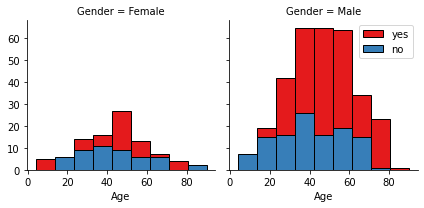

In [29]:
import seaborn as sns
bins = np.linspace(df.Age.min(), df.Age.max(),10)
grids = sns.FacetGrid(df, col="Gender", hue="HasDisease", palette="Set1", col_wrap=2)
grids.map(plt.hist, 'Age', bins=bins, ec="k")

grids.axes[-1].legend()
plt.show()

QuantitÃ© de bilirubine en fonction du sexe

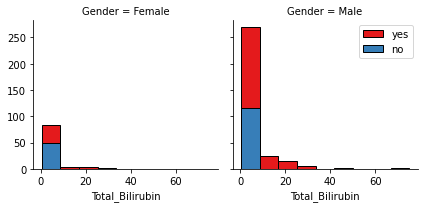

In [30]:
bins = np.linspace(df.Total_Bilirubin.min(), df.Total_Bilirubin.max(),10)
grids = sns.FacetGrid(df, col="Gender", hue="HasDisease", palette="Set1", col_wrap=2)
grids.map(plt.hist, 'Total_Bilirubin', bins=bins, ec="k")

grids.axes[-1].legend()
plt.show()

Les protiens totaux jouent un rÃ´le majeur dans les maladies du foie. Donc, en le traÃ§ant par sexe

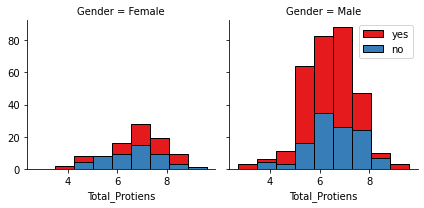

In [31]:
bins = np.linspace(df.Total_Protiens.min(), df.Total_Protiens.max(),10)
grids = sns.FacetGrid(df, col="Gender", hue="HasDisease", palette="Set1", col_wrap=2)
grids.map(plt.hist, 'Total_Protiens', bins=bins, ec="k")

grids.axes[-1].legend()
plt.show()

In [32]:
#convertir les mÃ¢les et les femelles en 0 et 1
df['Gender'].replace(to_replace=['Male','Female'], value=[0,1],inplace=True)
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,HasDisease
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1,yes
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1,yes
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1,yes
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1,yes
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1,yes


In [33]:
#convertir les dataset de "no disease" de 2 vers -1
df['Dataset'].replace(to_replace=[2], value=[-1],inplace=True)
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,HasDisease
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,-1,no
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1,yes
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1,yes
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1,yes
582,38,0,1.0,0.3,216,21,24,7.3,4.4,1.50,-1,no


### 4. Feature Selection

SÃ©lection des ensembles de caractÃ©ristiques (data_dec / features) et des Ã©tiquettes (data label)

In [34]:
Feature = df[['Age','Gender','Total_Bilirubin','Direct_Bilirubin',
                      'Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
                      'Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']]

In [35]:
data_desc = Feature
data_label = df['Dataset'].values
data_label[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

### 5. Normalisation des donnÃ©es 

La normalisation des donnÃ©es donne aux donnÃ©es une moyenne nulle et une variance unitaire.

In [36]:
from sklearn import preprocessing
data_desc= preprocessing.StandardScaler().fit(data_desc).transform(data_desc)
data_desc[0:5]

array([[ 1.24174059,  1.75254916, -0.41864741, -0.4937018 , -0.42742097,
        -0.35148206, -0.31442779,  0.27928958,  0.18973749, -0.15197768],
       [ 1.0568741 , -0.5705974 ,  1.21011064,  1.41392328,  1.6617218 ,
        -0.08674568, -0.03227764,  0.92305933,  0.06412731, -0.65471126],
       [ 1.0568741 , -0.5705974 ,  0.63525486,  0.91935382,  0.80892719,
        -0.10880704, -0.14238501,  0.4632238 ,  0.18973749, -0.18339853],
       [ 0.81038546, -0.5705974 , -0.37074276, -0.38772263, -0.44782276,
        -0.36251274, -0.30754608,  0.27928958,  0.31534768,  0.1622308 ],
       [ 1.67309571, -0.5705974 ,  0.09233551,  0.17749962, -0.39477812,
        -0.2908133 , -0.17335271,  0.73912512, -0.94075419, -1.72302011]])

### 6. Sépratation des données en données d'apprentissage et données de tests

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( data_desc, data_label, test_size=0.2, random_state=4)
print('Train Set:',X_train.shape, y_train.shape)
print('Test Set:',X_test.shape, y_test.shape)

Train Set: (456, 10) (456,)
Test Set: (114, 10) (114,)


## Classification


### 1. Classifieur KNN

In [38]:
#Â Changement du learning rate : on le prend trÃ¨s grand !
learning_rate = 1e-3

#Â Graine pour les tirages alÃ©atoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminÃ©e

# CrÃ©ation d'un KNN
kppvMC = classif.ClassifierKNN(10,3)

kppvMulti = classif.ClassifierMultiOAA(kppvMC)

In [158]:
kppvMulti.train(X_train,y_train)
a = kppvMulti.accuracy(X_train,y_train)
print("Accuracy sur données d'apprentissage: ", a)

Accuracy sur données d'apprentissage:  0.8574561403508771


In [40]:
for i in range(0,5):
    print(i+1,": (",y_train[i],") --> ",kppvMulti.predict(X_train[i,:]), "(",kppvMulti.score(X_train[i,:]),")")

1 : ( 1 ) -->  -1 ( [0.3333333333333333, 0.6666666666666666] )
2 : ( 1 ) -->  1 ( [0.6666666666666666, 0.3333333333333333] )
3 : ( -1 ) -->  -1 ( [0.3333333333333333, 0.6666666666666666] )
4 : ( 1 ) -->  1 ( [0.6666666666666666, 0.3333333333333333] )
5 : ( -1 ) -->  -1 ( [0.0, 1.0] )


In [159]:
a1 = kppvMulti.accuracy(X_test,y_test)
print("Accuracy sur données de tests: ",a1)

Accuracy sur données de tests:  0.543859649122807


In [42]:
for i in range(0,5):
    print(i+1,": (",y_test[i],") --> ",kppvMulti.predict(X_test[i,:]), "(",kppvMulti.score(X_test[i,:]),")")

1 : ( 1 ) -->  1 ( [0.6666666666666666, 0.3333333333333333] )
2 : ( 1 ) -->  1 ( [0.6666666666666666, 0.3333333333333333] )
3 : ( 1 ) -->  -1 ( [0.0, 1.0] )
4 : ( -1 ) -->  1 ( [0.6666666666666666, 0.3333333333333333] )
5 : ( -1 ) -->  -1 ( [0.0, 1.0] )


### 2. Classifieur Perceptron 

In [138]:

learning_rate = 0.001

#Â Graine pour les tirages alÃ©atoires :
np.random.seed(42)   # supprimer cette ligne une fois la mise au point terminÃ©e

# CrÃ©ation d'un perceptron
perceptronV3 = classif.ClassifierPerceptron(10,learning_rate)

perceptmulti = classif.ClassifierMultiOAA(perceptronV3)


In [160]:
perceptmulti.train(X_train,y_train)
b=perceptmulti.accuracy(X_train,y_train)
print("Accuracy sur données d'apprentissage: ",b)

Accuracy sur données d'apprentissage:  0.6096491228070176


In [140]:
for i in range(0,5):
    print(i+1,": (",y_train[i],") --> ",perceptmulti.predict(X_train[i,:]), "(",perceptmulti.score(X_train[i,:]),")")

1 : ( 1 ) -->  1 ( [0.2041187072791218, -0.2039740973516127] )
2 : ( 1 ) -->  -1 ( [-0.01948132510608378, 0.015740957595064872] )
3 : ( -1 ) -->  -1 ( [-0.11477331654866876, 0.10985493827497536] )
4 : ( 1 ) -->  -1 ( [-0.08910699135553912, 0.08473726260582157] )
5 : ( -1 ) -->  -1 ( [-0.062352129716508845, 0.05874373439649338] )


In [161]:
b1=perceptmulti.accuracy(X_test,y_test)
print("Accuracy sur données de tests: ",b1)

Accuracy sur données de tests:  0.5614035087719298


In [137]:
for i in range(0,5):
    print(i+1,": (",y_test[i],") --> ",perceptmulti.predict(X_test[i,:]), "(",perceptmulti.score(X_test[i,:]),")")

1 : ( 1 ) -->  -1 ( [-1.0264946041261985e-06, 1.026494604126202e-06] )
2 : ( 1 ) -->  -1 ( [-1.2012102281905999e-06, 1.201210228190602e-06] )
3 : ( 1 ) -->  -1 ( [-3.292230372988095e-06, 3.2922303729880958e-06] )
4 : ( -1 ) -->  1 ( [7.747831152357852e-07, -7.747831152357854e-07] )
5 : ( -1 ) -->  -1 ( [-2.5177352108188438e-06, 2.5177352108188446e-06] )


### 3. Classifieur Perceptron Kernel

In [119]:
learning_rate = 0.001
kernel = ut.KernelBias(10,11)

In [120]:
perker = classif.ClassifierPerceptronKernel(10, learning_rate, kernel)
perkerMulti = classif.ClassifierMultiOAA(perker)

In [162]:
perkerMulti.train(X_train, y_train)
c=perkerMulti.accuracy(X_train,y_train)
print("Accuracy sur données d'apprentissage: ",c)

Accuracy sur données d'apprentissage:  0.6578947368421053


In [122]:
for i in range(0,5):
    print(i+1,": (",y_train[i],") --> ",perkerMulti.predict(X_train[i,:]), "(",perkerMulti.score(X_train[i,:]),")")

1 : ( 1 ) -->  -1 ( [0.0003989827084274278, 0.011062494027287706] )
2 : ( 1 ) -->  -1 ( [0.0007276319638400072, 0.0074098837989396375] )
3 : ( -1 ) -->  1 ( [0.002013871479481875, -0.0013986951916933844] )
4 : ( 1 ) -->  -1 ( [-0.0002495148327190783, 0.0011464227171954638] )
5 : ( -1 ) -->  -1 ( [0.000854104680233387, 0.0031401845439671446] )


In [163]:
c1=perkerMulti.accuracy(X_test,y_test)
print("Accuracy sur données de tests: ",c1)

Accuracy sur données de tests:  0.7017543859649122


In [124]:
for i in range(0,5):
    print(i+1,": (",y_test[i],") --> ",perkerMulti.predict(X_test[i,:]), "(",perkerMulti.score(X_test[i,:]),")")

1 : ( 1 ) -->  1 ( [0.002188601472949782, 0.0006665812086923298] )
2 : ( 1 ) -->  -1 ( [0.0014868148296656564, 0.0034901442079541675] )
3 : ( 1 ) -->  1 ( [-0.0038782267662701058, -0.004465518913468637] )
4 : ( -1 ) -->  -1 ( [0.0006607986688278457, 0.004502516475634832] )
5 : ( -1 ) -->  1 ( [0.00030354535041974065, -0.0012888473864190782] )


### 4. Classifieur Adaline

In [154]:

AdalinevMC = classif.ClassifierADALINE2(10,100)

AdalineMulti = classif.ClassifierMultiOAA(AdalinevMC)

In [164]:
AdalineMulti.train(X_train,y_train)
d=AdalineMulti.accuracy(X_train,y_train)
print("Accuracy sur données d'apprentissage: ",d)

Accuracy sur données d'apprentissage:  0.6140350877192983


In [156]:
for i in range(0,5):
    print(i+1,": (",y_train[i],") --> ",AdalineMulti.predict(X_train[i,:]), "(",AdalineMulti.score(X_train[i,:]),")")

1 : ( 1 ) -->  -1 ( [-0.023659504801459078, 0.023659504801459078] )
2 : ( 1 ) -->  -1 ( [-0.04775758430871941, 0.04775758430871941] )
3 : ( -1 ) -->  -1 ( [-0.05788993481423868, 0.05788993481423868] )
4 : ( 1 ) -->  -1 ( [-0.1444158103481355, 0.1444158103481355] )
5 : ( -1 ) -->  -1 ( [-0.036472267986818366, 0.036472267986818366] )


In [165]:
d1=AdalineMulti.accuracy(X_test,y_test)
print("Accuracy sur données de tests: ",d1)

Accuracy sur données de tests:  0.543859649122807


In [85]:
for i in range(0,5):
    print(i+1,": (",y_test[i],") --> ",AdalineMulti.predict(X_test[i,:]), "(",AdalineMulti.score(X_test[i,:]),")")

1 : ( 1 ) -->  -1 ( [-0.12278751745107656, 0.12278751745107656] )
2 : ( 1 ) -->  -1 ( [-0.06964551896771357, 0.06964551896771357] )
3 : ( 1 ) -->  -1 ( [-0.2698249402590822, 0.2698249402590822] )
4 : ( -1 ) -->  -1 ( [-0.07435386452630545, 0.07435386452630545] )
5 : ( -1 ) -->  -1 ( [-0.10363010409475534, 0.10363010409475534] )


In [166]:
data = {'Classifieur': ['KNN', 'Perceptron', 'Perceptron Kernel', 'Adaline'], 'Apprentissage Accuracy': [a, b, c, d], 'Tests Accuracy': [a1, b1, c1, d1]}
df = pd.DataFrame(data)
print(df)

         Classifieur  Apprentissage Accuracy  Tests Accuracy
0                KNN                0.857456        0.543860
1         Perceptron                0.609649        0.561404
2  Perceptron Kernel                0.657895        0.701754
3            Adaline                0.614035        0.543860


Nous constatons que le KNN a la meilleure accuracy sur les données d'apprentissage et lui et Adaline ont la pire accuracy sur les données tests, par contre le Perceptron Kernel a la meilleure accuracy sur les données de tests et que le Perceptron a la pire accuracy sur les données d'apprentissage.